In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.utils import shuffle
%matplotlib inline
from sklearn.utils import column_or_1d
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from pyod.models.hbos import HBOS
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [82]:
shuttle=pd.read_csv("shuttle.csv")
print(shuttle.shape)
print(shuttle.head())

(46463, 10)
   108.0  3.0  109.0  0.0  72.0   7.0  1.0   36.0  36.0.1  o
0   81.0  0.0   84.0  0.0 -14.0  -2.0  4.0  100.0    96.0  o
1   81.0  0.0   84.0  0.0 -20.0  16.0  4.0  105.0   102.0  o
2   76.0 -1.0   81.0  0.0 -42.0  -3.0  5.0  125.0   120.0  o
3  105.0  0.0  107.0  2.0  70.0   0.0  1.0   37.0    36.0  o
4   79.0  0.0   83.0 -1.0 -40.0   7.0  4.0  124.0   120.0  o


In [83]:
feature_vector=pd.DataFrame()
feature_vector=shuttle.iloc[:,:-1]
y=shuttle.iloc[:,-1:]
y = column_or_1d(y, warn=False)

In [84]:
X_train,X_test,y_train,y_test = train_test_split(feature_vector,y, test_size=0.3,random_state=49)
scaler=MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)
n=0
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [85]:
score=[]

for i in range(1,25):
    classifier=KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train,y_train)
    y_predict = classifier.predict(X_test)
    n=accuracy_score(y_test,y_predict)
    score.append(n)
score

[0.9996412942104885,
 0.9996412942104885,
 0.9996412942104885,
 0.9994260707367817,
 0.999497811894684,
 0.9993543295788794,
 0.9993543295788794,
 0.9993543295788794,
 0.9993543295788794,
 0.9993543295788794,
 0.9993543295788794,
 0.9992825884209772,
 0.9992825884209772,
 0.9992825884209772,
 0.9992825884209772,
 0.9992825884209772,
 0.9992825884209772,
 0.9991391061051725,
 0.9991391061051725,
 0.9991391061051725,
 0.9991391061051725,
 0.9991391061051725,
 0.9991391061051725,
 0.9991391061051725]

In [86]:
max=0
index=0
for i in range(0,24):
    if (score[i]>max):
        max=score[i]
        index=i
print (index)
k=index+1
print(k)

0
1


In [87]:
classifier=KNeighborsClassifier(n_neighbors=20)
classifier.fit(X_train,y_train)
y_predict = classifier.predict(X_test)
accuracy_score(y_test,y_predict)

0.9991391061051725

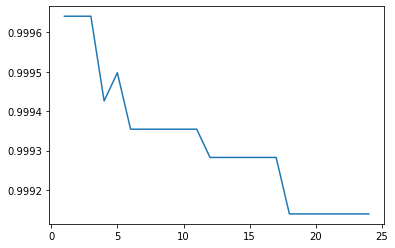

In [88]:
plt.plot(range(1,25),score)

[0.9802858126721763, 0.9984504132231405, 0.9269111570247934, 0.9981921487603306, 0.9609159779614325, 0.9304407713498623, 0.9504132231404959, 0.9163223140495868, 0.93741391184573, 0.9294938016528925, 0.9286329201101928, 0.9275998622589532, 0.9177858126721763, 0.9224345730027548, 0.9160640495867769, 0.9174414600550964, 0.9189910468319559, 0.9243285123966942, 0.9169249311294766, 0.9195075757575758, 0.9173553719008265, 0.915891873278237, 0.9181301652892562, 0.9190771349862259, 0.9226928374655647, 0.9143422865013774, 0.918732782369146, 0.9273415977961432, 0.9176136363636364]
[[10457   930]
 [    5   224]]


0.9195075757575758

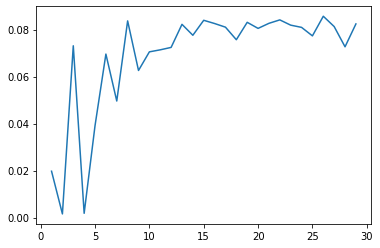

In [89]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(feature_vector, y, test_size = 0.25, random_state = 1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

n=[]
for i in range (1,30):
    clf=HBOS(n_bins=i)
    clf.fit(X_train)

    y_train_pred=clf.labels_
    y_train_scores=clf.decision_scores_

    y_test_pred=clf.predict(X_test)
    y_test_score=clf.decision_function(X_test)
    n.append(accuracy_score(y_test,y_test_pred))
print((n))
n2=[]
for i in range (0,29):
    n2.append(1-n[i])

plt.plot(range(1,30),n2)

clf=HBOS(n_bins=20)
clf.fit(X_train)

y_train_pred=clf.labels_
y_train_scores=clf.decision_scores_

y_test_pred=clf.predict(X_test)
y_test_score=clf.decision_function(X_test)
cm=confusion_matrix(y_test,y_test_pred)
print(cm)
accuracy_score(y_test,y_test_pred)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


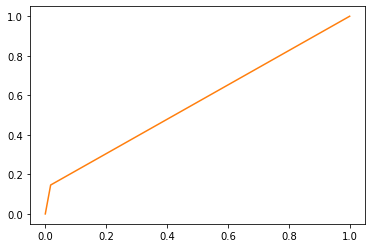

In [109]:
X=shuttle.iloc[:,:-1]
encoder = LabelEncoder()
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(y_train)
print(y_test)


error=[]
r=2
for i in range(1,r):
    clf=LocalOutlierFactor(n_neighbors=20,contamination=0.01)
    y_pred=clf.fit_predict(X)
    for i in range (0,y_pred.size):
        if (y_pred[i]==1):
            y_pred[i]=0
    for i in range (0,y_pred.size):
        if (y_pred[i]==-1):
            y_pred[i]=1
    accuracy_score(y,y_pred)
    n_errors =(y_pred != y).sum()
    error.append(n_errors/y.size)
plt.plot(range(1,r),error)

fpr,tpr,threshold=metrics.roc_curve(y_pred,y)
roc_auc=metrics.auc(fpr,tpr)

plt.plot(fpr,tpr,roc_auc)
plt.show()

In [110]:
print(min(error))
print(roc_auc)

0.025956137141381314
0.5643244189672576
